# **PROBLEM STATEMENT**

Topic Modeling for Research Articles 2.0
Researchers have access to large online archives of scientific articles. As a consequence, finding relevant articles has become more and more difficult. Tagging or topic modelling provides a way to give clear token of identification to research articles which facilitates recommendation and search process. 

Earlier on the Independence Day we conducted a Hackathon to predict the topics for each article included in the test set. Continuing with the same problem, In this Live Hackathon we will take one more step ahead and predict the tags associated with the articles.

Given the abstracts for a set of research articles, predict the tags for each article included in the test set. 
Note that a research article can possibly have multiple tags. The research article abstracts are sourced from the following 4 topics: 

1. Computer Science

2. Mathematics

3. Physics

4. Statistics

List of possible tags are as follows:

[Tags, Analysis of PDEs, Applications, Artificial Intelligence,Astrophysics of Galaxies, Computation and Language, Computer Vision and Pattern Recognition, Cosmology and Nongalactic Astrophysics, Data Structures and Algorithms, Differential Geometry, Earth and Planetary Astrophysics, Fluid Dynamics,Information Theory, Instrumentation and Methods for Astrophysics, Machine Learning, Materials Science, Methodology, Number Theory, Optimization and Control, Representation Theory, Robotics, Social and Information Networks, Statistics Theory, Strongly Correlated Electrons, Superconductivity, Systems and Control]

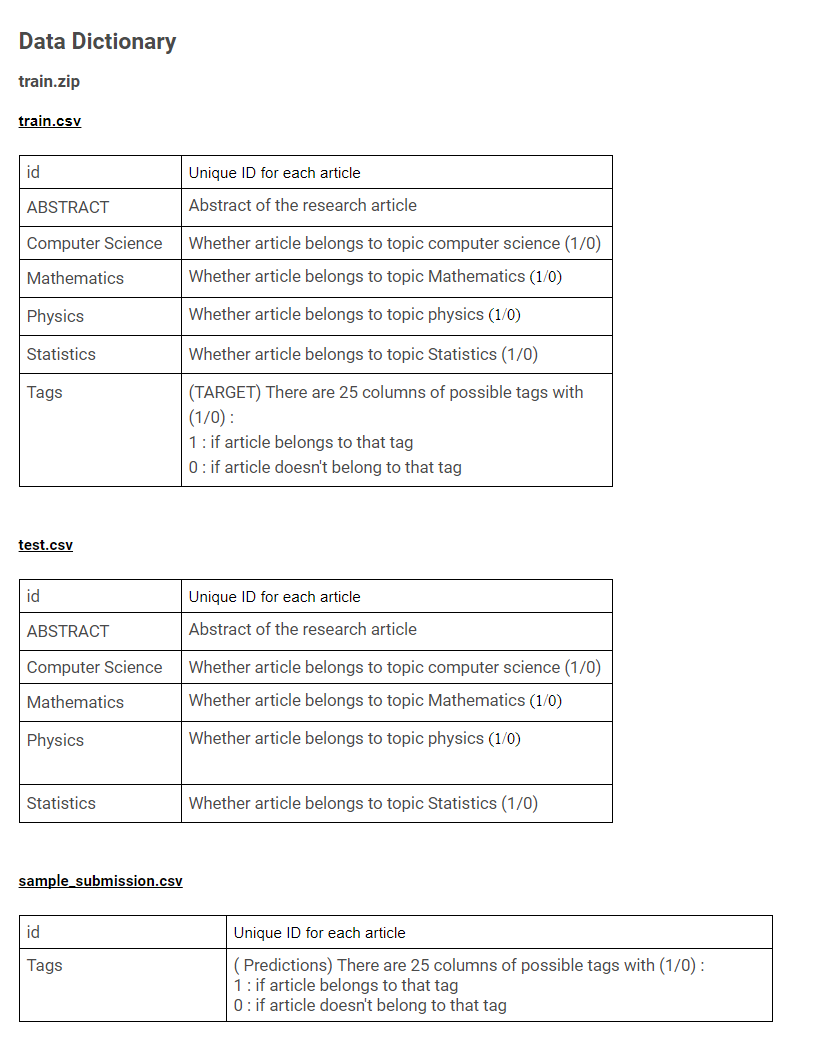

In [ ]:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.simplefilter('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from lightgbm import LGBMClassifier

In [ ]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
ss = pd.read_csv('SS.csv')
tags = pd.read_csv('Tags.csv')

# **Making a Submission**

In [ ]:
ss

,id,Analysis of PDEs,Applications,Artificial Intelligence,Astrophysics of Galaxies,Computation and Language,Computer Vision and Pattern Recognition,Cosmology and Nongalactic Astrophysics,Data Structures and Algorithms,Differential Geometry,Earth and Planetary Astrophysics,Fluid Dynamics,Information Theory,Instrumentation and Methods for Astrophysics,Machine Learning,Materials Science,Methodology,Number Theory,Optimization and Control,Representation Theory,Robotics,Social and Information Networks,Statistics Theory,Strongly Correlated Electrons,Superconductivity,Systems and Control
0,9409,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,17934,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,16071,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,16870,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,10496,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5997,11506,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5998,3418,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5999,7369,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6000,8421,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# **EDA**

### **1. Brief look at the dataset**.

In [ ]:
train.head(3)
test.head(3)
tags.head(3)

,id,ABSTRACT,Computer Science,Mathematics,Physics,Statistics,Analysis of PDEs,Applications,Artificial Intelligence,Astrophysics of Galaxies,Computation and Language,Computer Vision and Pattern Recognition,Cosmology and Nongalactic Astrophysics,Data Structures and Algorithms,Differential Geometry,Earth and Planetary Astrophysics,Fluid Dynamics,Information Theory,Instrumentation and Methods for Astrophysics,Machine Learning,Materials Science,Methodology,Number Theory,Optimization and Control,Representation Theory,Robotics,Social and Information Networks,Statistics Theory,Strongly Correlated Electrons,Superconductivity,Systems and Control
0,1824,a ever-growing datasets inside observational a...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,3094,we propose the framework considering optimal $...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8463,nanostructures with open shell transition meta...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


,id,ABSTRACT,Computer Science,Mathematics,Physics,Statistics
0,9409,fundamental frequency (f0) approximation from ...,0,0,0,1
1,17934,"this large-scale study, consisting of 24.5 mil...",1,0,0,1
2,16071,we present a stability analysis of the plane c...,0,0,1,0


,Tags
0,Analysis of PDEs
1,Applications
2,Artificial Intelligence


In [ ]:
ID_COL = 'id'

TARGET_COLS = ['Analysis of PDEs', 'Applications',
               'Artificial Intelligence', 'Astrophysics of Galaxies',
               'Computation and Language', 'Computer Vision and Pattern Recognition',
               'Cosmology and Nongalactic Astrophysics',
               'Data Structures and Algorithms', 'Differential Geometry',
               'Earth and Planetary Astrophysics', 'Fluid Dynamics',
               'Information Theory', 'Instrumentation and Methods for Astrophysics',
               'Machine Learning', 'Materials Science', 'Methodology', 'Number Theory',
               'Optimization and Control', 'Representation Theory', 'Robotics',
               'Social and Information Networks', 'Statistics Theory',
               'Strongly Correlated Electrons', 'Superconductivity',
               'Systems and Control']

TOPIC_COLS = ['Computer Science', 'Mathematics', 'Physics', 'Statistics']

In [ ]:
len(TARGET_COLS)

25

### **2. Dataset Shape (Number of Samples and Variables in the dataset)**

In [ ]:
print(f'\n->->->| Train contains {train.shape[0]} samples and {train.shape[1]} variables')
print(f'\n->->->| Test contains {test.shape[0]} samples and {test.shape[1]} variables')
print(f'\n->->->| Number of distinct SUB TOPICS is {len(TARGET_COLS)}')

features = [c for c in train.columns if c not in [ID_COL] + TARGET_COLS]
print(f'\n->->->| The dataset contains {len(features)} features')


->->->| Train contains 14004 samples and 31 variables

->->->| Test contains 6002 samples and 6 variables

->->->| Number of distinct SUB TOPICS is 25

->->->| The dataset contains 5 features


### **3.Target Distribution**

In [ ]:
100 * (train[TARGET_COLS].sum()/(train.shape[0])).sort_values(ascending=False)

Machine Learning                                27.313625
Artificial Intelligence                          9.825764
Robotics                                         6.812339
Computer Vision and Pattern Recognition          6.705227
Strongly Correlated Electrons                    6.376750
Materials Science                                5.534133
Computation and Language                         4.605827
Cosmology and Nongalactic Astrophysics           4.520137
Optimization and Control                         4.434447
Social and Information Networks                  4.420166
Analysis of PDEs                                 4.334476
Applications                                     4.227364
Astrophysics of Galaxies                         4.098829
Methodology                                      4.098829
Systems and Control                              4.041702
Differential Geometry                            3.963153
Superconductivity                                3.870323
Statistics The

###**4. Variable Datatypes**

Lets have a look at the kind of data types that is being used to store the variables in pandas.

pandas info() method on dataframe allows to do that. For each variable we can see the number of non-null values along with their datatypes.



In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14004 entries, 0 to 14003
Data columns (total 31 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   id                                            14004 non-null  int64 
 1   ABSTRACT                                      14004 non-null  object
 2   Computer Science                              14004 non-null  int64 
 3   Mathematics                                   14004 non-null  int64 
 4   Physics                                       14004 non-null  int64 
 5   Statistics                                    14004 non-null  int64 
 6   Analysis of PDEs                              14004 non-null  int64 
 7   Applications                                  14004 non-null  int64 
 8   Artificial Intelligence                       14004 non-null  int64 
 9   Astrophysics of Galaxies                      14004 non-null  int64 
 10

### **5. Null Values**

Although the info() function did tell us about non-null values ideally we want to have a look at the percentage of null values in each variable.

In [ ]:
null_values_per_variable = 100 * (train.isnull().sum()/train.shape[0]).round(3)#.reset_index()
null_values_per_variable.sort_values(ascending=False)

Systems and Control                             0.0
Differential Geometry                           0.0
ABSTRACT                                        0.0
Computer Science                                0.0
Mathematics                                     0.0
Physics                                         0.0
Statistics                                      0.0
Analysis of PDEs                                0.0
Applications                                    0.0
Artificial Intelligence                         0.0
Astrophysics of Galaxies                        0.0
Computation and Language                        0.0
Computer Vision and Pattern Recognition         0.0
Cosmology and Nongalactic Astrophysics          0.0
Data Structures and Algorithms                  0.0
Earth and Planetary Astrophysics                0.0
Superconductivity                               0.0
Fluid Dynamics                                  0.0
Information Theory                              0.0
Instrumentat

### **6. Unique values in each variable**

In [ ]:
train.nunique()

id                                              14004
ABSTRACT                                        14004
Computer Science                                    2
Mathematics                                         2
Physics                                             2
Statistics                                          2
Analysis of PDEs                                    2
Applications                                        2
Artificial Intelligence                             2
Astrophysics of Galaxies                            2
Computation and Language                            2
Computer Vision and Pattern Recognition             2
Cosmology and Nongalactic Astrophysics              2
Data Structures and Algorithms                      2
Differential Geometry                               2
Earth and Planetary Astrophysics                    2
Fluid Dynamics                                      2
Information Theory                                  2
Instrumentation and Methods 

**ADDITIONAL DESCRIPTIVE EDA**

In [ ]:
train[TOPIC_COLS].sum().sort_values(ascending=False)

Computer Science    5884
Physics             3856
Statistics          3794
Mathematics         2831
dtype: int64

In [ ]:
100 * (train[TARGET_COLS].sum()/(train.shape[0])).sort_values(ascending=False)

Machine Learning                                27.313625
Artificial Intelligence                          9.825764
Robotics                                         6.812339
Computer Vision and Pattern Recognition          6.705227
Strongly Correlated Electrons                    6.376750
Materials Science                                5.534133
Computation and Language                         4.605827
Cosmology and Nongalactic Astrophysics           4.520137
Optimization and Control                         4.434447
Social and Information Networks                  4.420166
Analysis of PDEs                                 4.334476
Applications                                     4.227364
Astrophysics of Galaxies                         4.098829
Methodology                                      4.098829
Systems and Control                              4.041702
Differential Geometry                            3.963153
Superconductivity                                3.870323
Statistics The

## **VISUAL EDA THROUGH WORDCLOUDS**

In [ ]:
from wordcloud import WordCloud, STOPWORDS

wc = WordCloud(stopwords = set(list(STOPWORDS) + ['inside']), random_state = 42)

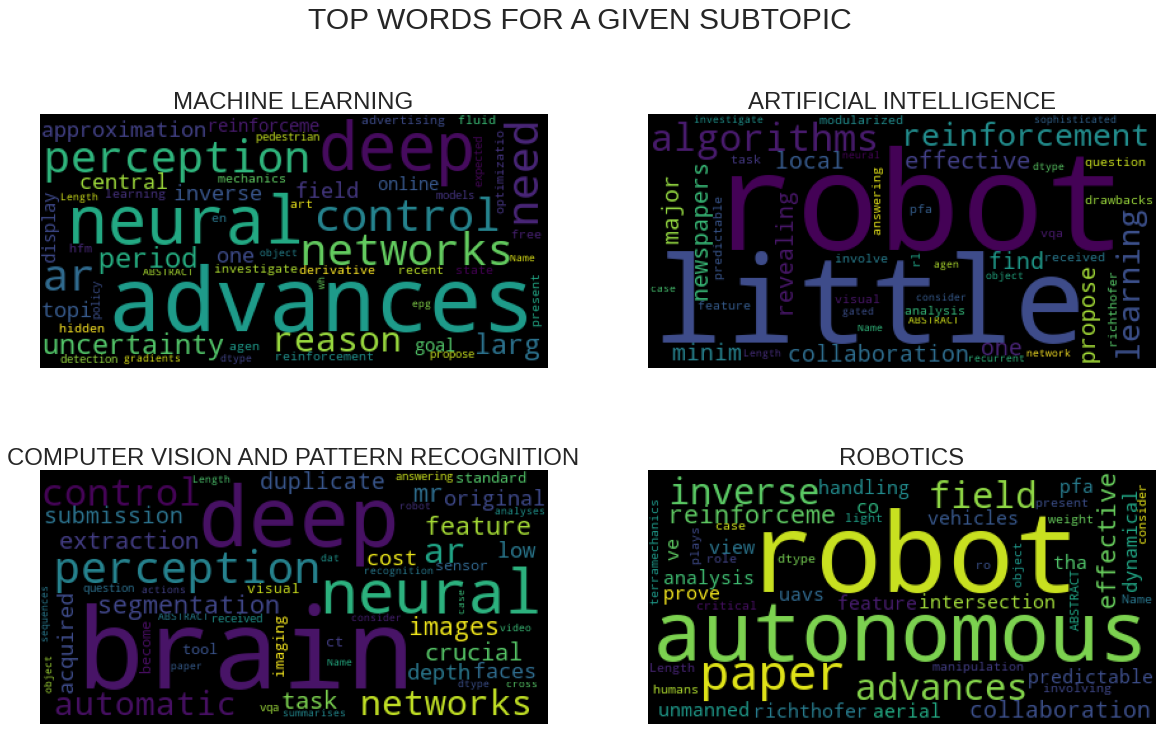

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = [ax for axes_row in axes for ax in axes_row]
for i, sub_topic_name in enumerate(['Machine Learning', 'Artificial Intelligence', 'Computer Vision and Pattern Recognition', 'Robotics']):
  sub_topic = train[train[sub_topic_name] == 1]
  op = wc.generate(str(sub_topic['ABSTRACT']))
  _ = axes[i].imshow(op)
  _ = axes[i].set_title(sub_topic_name.upper(), fontsize=24)
  _ = axes[i].axis('off')
_ = plt.suptitle('TOP WORDS FOR A GIVEN SUBTOPIC', fontsize=30)

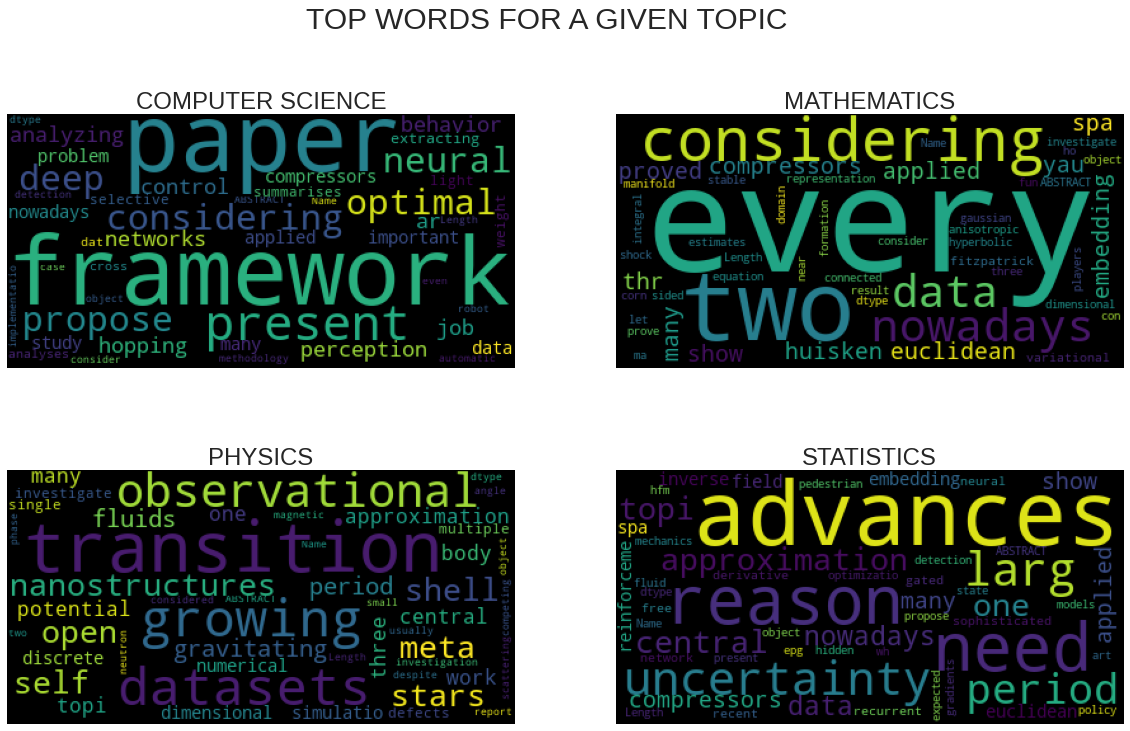

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = [ax for axes_row in axes for ax in axes_row]
for i, sub_topic_name in enumerate(TOPIC_COLS):
  sub_topic = train[train[sub_topic_name] == 1]
  op = wc.generate(str(sub_topic['ABSTRACT']))
  _ = axes[i].imshow(op)
  _ = axes[i].set_title(sub_topic_name.upper(), fontsize=24)
  _ = axes[i].axis('off')
_ = plt.suptitle('TOP WORDS FOR A GIVEN TOPIC', fontsize=30)

# **MODEL BUILDING**

## **Bag of Words Approach**

* **Text**: Collection of Words
* **Word**: Adds some kind of meaning to the sentence.
* We make a bag containing all the words in our dataset.
* **Features** : How many times is a particular word from the bag is present in our sentence ?

In [ ]:
sent1 = 'Artificial Intelligence is the future'
sent2 = 'Analytics Vidhya is the best platform to learn Artificial Intelligence'
sent3 = 'To build a better future the way forward is to learn and improve constantly'

In [ ]:
all_sentences = [sent1, sent2, sent3]
all_words = [w for sent in all_sentences for w in sent.split()]
all_words = list(set(all_words))
all_words

['learn',
 'and',
 'the',
 'best',
 'forward',
 'constantly',
 'a',
 'platform',
 'way',
 'Artificial',
 'To',
 'Vidhya',
 'Analytics',
 'better',
 'improve',
 'future',
 'is',
 'build',
 'Intelligence',
 'to']

In [ ]:
columns = {word: [] for word in all_words}
for word in all_words:
  for sent in all_sentences:
    sent_words = sent.split()
    count = sum([(word==w) for w in sent_words])
    columns[word].append(count)

In [ ]:
sent1 = 'Artificial Intelligence is the future '
sent2 = 'Analytics Vidhya is the best platform to learn Artificial Intelligence'
sent3 = 'To build a better future the way forward is to learn and improve constantly'

In [ ]:
counts = pd.DataFrame(columns)

In [ ]:
counts

,learn,and,the,best,forward,constantly,a,platform,way,Artificial,To,Vidhya,Analytics,better,improve,future,is,build,Intelligence,to
0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0
1,1,0,1,1,0,0,0,1,0,1,0,1,1,0,0,0,1,0,1,1
2,1,1,1,0,1,1,1,0,1,0,1,0,0,1,1,1,1,1,0,1


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

### **Count Vectorizer**

In [ ]:
vec = CountVectorizer(max_features=10000)
combined = list(train['ABSTRACT']) + list(test['ABSTRACT'])
vec.fit(combined)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=10000, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
trn, val = train_test_split(train, test_size=0.2, random_state=2)

In [ ]:
trn_abs = vec.transform(trn['ABSTRACT'])
val_abs = vec.transform(val['ABSTRACT'])
tst_abs = vec.transform(test['ABSTRACT'])

In [ ]:
trn[TARGET_COLS]

,Analysis of PDEs,Applications,Artificial Intelligence,Astrophysics of Galaxies,Computation and Language,Computer Vision and Pattern Recognition,Cosmology and Nongalactic Astrophysics,Data Structures and Algorithms,Differential Geometry,Earth and Planetary Astrophysics,Fluid Dynamics,Information Theory,Instrumentation and Methods for Astrophysics,Machine Learning,Materials Science,Methodology,Number Theory,Optimization and Control,Representation Theory,Robotics,Social and Information Networks,Statistics Theory,Strongly Correlated Electrons,Superconductivity,Systems and Control
6036,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5724,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2836,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
11745,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11798,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
13896,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6637,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2575,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
%%time

from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(LogisticRegression(C = 100, n_jobs=-1))
clf.fit(trn_abs, trn[TARGET_COLS])

CPU times: user 356 ms, sys: 138 ms, total: 493 ms
Wall time: 17.5 s


In [ ]:
val_preds = clf.predict(val_abs)
f1_score(val[TARGET_COLS], val_preds, average='micro')

0.6221968290244251

In [ ]:
preds_test = clf.predict(tst_abs)

In [ ]:
def download_preds(preds_test, file_name = 'hacklive_sub.csv'):

  ## 1. Setting the target column with our obtained predictions
  ss[TARGET_COLS] = preds_test

  ## 2. Saving our predictions to a csv file

  ss.to_csv(file_name, index = False)

  ## 3. Downloading and submitting the csv file
  from google.colab import files
  files.download(file_name)

In [ ]:
download_preds(preds_test, 'hacklive_NLP_count.csv')

## **Tfidf Vectorizer**

**TF-IDF** = Term-Frequency * Inverse Document Frequency

**Term-Frequency** = (Frequency of the word in the sentence) / (Total number of words in the sentence)

**Inverse Document Frequency** = (Total number of sentences)/(Number of sentences containing the word)

In [ ]:
sent1 = 'Artificial Intelligence is the future'
sent2 = 'Analytics Vidhya is the best platform to learn Artificial Intelligence'
sent3 = 'To build a better future the way forward is to learn and improve constantly'

In [ ]:
term_frequency = counts.copy()
term_frequency = term_frequency.apply(lambda x: x/term_frequency.sum(axis = 1))
term_frequency

,learn,and,the,best,forward,constantly,a,platform,way,Artificial,To,Vidhya,Analytics,better,improve,future,is,build,Intelligence,to
0,0.000000,0.000000,0.200000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.2,0.000000,0.0,0.0,0.000000,0.000000,0.200000,0.200000,0.000000,0.2,0.000000
1,0.100000,0.000000,0.100000,0.1,0.000000,0.000000,0.000000,0.1,0.000000,0.1,0.000000,0.1,0.1,0.000000,0.000000,0.000000,0.100000,0.000000,0.1,0.100000
2,0.071429,0.071429,0.071429,0.0,0.071429,0.071429,0.071429,0.0,0.071429,0.0,0.071429,0.0,0.0,0.071429,0.071429,0.071429,0.071429,0.071429,0.0,0.071429


In [ ]:
inverse_document_frequency = counts.copy()
inverse_document_frequency = inverse_document_frequency.apply(lambda x: 3/(x > 0).sum())
inverse_document_frequency

learn           1.5
and             3.0
the             1.0
best            3.0
forward         3.0
constantly      3.0
a               3.0
platform        3.0
way             3.0
Artificial      1.5
To              3.0
Vidhya          3.0
Analytics       3.0
better          3.0
improve         3.0
future          1.5
is              1.0
build           3.0
Intelligence    1.5
to              1.5
dtype: float64

In [ ]:
tfidf = term_frequency * inverse_document_frequency
tfidf

,learn,and,the,best,forward,constantly,a,platform,way,Artificial,To,Vidhya,Analytics,better,improve,future,is,build,Intelligence,to
0,0.000000,0.000000,0.200000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.30,0.000000,0.0,0.0,0.000000,0.000000,0.300000,0.200000,0.000000,0.30,0.000000
1,0.150000,0.000000,0.100000,0.3,0.000000,0.000000,0.000000,0.3,0.000000,0.15,0.000000,0.3,0.3,0.000000,0.000000,0.000000,0.100000,0.000000,0.15,0.150000
2,0.107143,0.214286,0.071429,0.0,0.214286,0.214286,0.214286,0.0,0.214286,0.00,0.214286,0.0,0.0,0.214286,0.214286,0.107143,0.071429,0.214286,0.00,0.107143


In [ ]:
vec = TfidfVectorizer(max_features=10000)
_ = vec.fit(list(train['ABSTRACT']) + list(test['ABSTRACT']))

trn_abs = vec.transform(trn['ABSTRACT'])
val_abs = vec.transform(val['ABSTRACT'])
tst_abs = vec.transform(test['ABSTRACT'])

clf = OneVsRestClassifier(LogisticRegression(C = 100, n_jobs=-1))
_ = clf.fit(trn_abs, trn[TARGET_COLS])

val_preds = clf.predict(val_abs)
f1_score(val[TARGET_COLS], val_preds, average='micro')

0.6389689158453373

In [ ]:
preds_test = clf.predict(tst_abs)
download_preds(preds_test, 'hacklive_NLP_tfidf.csv')

### **Optimal Threshold for F1-score**

In [ ]:
def get_best_thresholds(true, preds):
  thresholds = [i/100 for i in range(100)]
  best_thresholds = []
  for idx in range(25):
    f1_scores = [f1_score(true[:, idx], (preds[:, idx] > thresh) * 1) for thresh in thresholds]
    best_thresh = thresholds[np.argmax(f1_scores)]
    best_thresholds.append(best_thresh)
  return best_thresholds

In [ ]:
val_preds = clf.predict_proba(val_abs)

best_thresholds = get_best_thresholds(val[TARGET_COLS].values, val_preds)

for i, thresh in enumerate(best_thresholds):
  val_preds[:, i] = (val_preds[:, i] > thresh) * 1
  
f1_score(val[TARGET_COLS], val_preds, average='micro')

0.6642555756479807

In [ ]:
preds_test = clf.predict_proba(tst_abs)

for i, thresh in enumerate(best_thresholds):
  preds_test[:, i] = (preds_test[:, i] > thresh) * 1

download_preds(preds_test, 'hacklive_NLP_tfidf_threshold_optimized.csv')

In [ ]:
TOPIC_COLS

['Computer Science', 'Mathematics', 'Physics', 'Statistics']

**Combining Topics**

In [ ]:
trn_abs.shape

(11203, 10000)

In [ ]:
vec = CountVectorizer(max_features=10000)
_ = vec.fit(list(train['ABSTRACT']) + list(test['ABSTRACT']))

trn_abs = vec.transform(trn['ABSTRACT'])
val_abs = vec.transform(val['ABSTRACT'])
tst_abs = vec.transform(test['ABSTRACT'])
print(trn_abs.shape, val_abs.shape, tst_abs.shape)

trn2 = np.hstack((trn_abs.toarray(), trn[TOPIC_COLS]))
val2 = np.hstack((val_abs.toarray(), val[TOPIC_COLS]))
tst2 = np.hstack((tst_abs.toarray(), test[TOPIC_COLS]))

print(trn2.shape, val2.shape, tst2.shape)

(11203, 10000) (2801, 10000) (6002, 10000)
(11203, 10004) (2801, 10004) (6002, 10004)


In [ ]:
from scipy.sparse import csr_matrix

trn2 = csr_matrix(trn2.astype('int16'))
val2 = csr_matrix(val2.astype('int16'))
tst2 = csr_matrix(tst2.astype('int16'))

In [ ]:
!pip install catboost

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = OneVsRestClassifier(RandomForestClassifier(
                                                 n_jobs = -1,
                                                 random_state = 123,
                                                 verbose = 300,
                                                 ))
rfc = clf.fit(trn2, trn[TARGET_COLS])

rfc_val_preds = rfc.predict_proba(val2)
best_thresholds = get_best_thresholds(val[TARGET_COLS].values, rfc_val_preds)

for i, thresh in enumerate(best_thresholds):
  rfc_val_preds[:, i] = (rfc_val_preds[:, i] > thresh) * 1

f1_score(val[TARGET_COLS], rfc_val_preds, average='micro') # 0.7254 # 2 minutes

In [ ]:
rfc_preds_test = rfc.predict_proba(tst2)

for i, thresh in enumerate(best_thresholds):
  rfc_preds_test[:, i] = (rfc_preds_test[:, i] > thresh) * 1

rfc_preds_test
# download_preds(rfc_preds_test, 'hacklive_NLP_.csv')

In [ ]:
from catboost import CatBoostClassifier
clf = OneVsRestClassifier(CatBoostClassifier( 
                                             iterations= 100,
                                             learning_rate = 0.4, #0.4
                                             rsm = 0.4, # 0.4
                                             random_state = 123,
                                             verbose = 50,
                                             early_stopping_rounds = 50))
cbc = clf.fit(trn2, trn[TARGET_COLS])

cbc_val_preds = cbc.predict_proba(val2)
best_thresholds = get_best_thresholds(val[TARGET_COLS].values, cbc_val_preds)

for i, thresh in enumerate(best_thresholds):
  cbc_val_preds[:, i] = (cbc_val_preds[:, i] > thresh) * 1

f1_score(val[TARGET_COLS], cbc_val_preds, average='micro') # 0.7347 # 4 minutes

In [ ]:
cbc_preds_test = cbc.predict_proba(tst2)

for i, thresh in enumerate(best_thresholds):
  cbc_preds_test[:, i] = (cbc_preds_test[:, i] > thresh) * 1

cbc_preds_test
# download_preds(rfc_preds_test, 'hacklive_NLP_.csv')

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from xgboost import XGBClassifier
clf = OneVsRestClassifier(XGBClassifier( 
                                             iterations = 100, #100
                                             max_depth = 8, #8
                                             learning_rate = 0.1, #0.1
                                             colsample_bytree= 0.6, #0.6
                                             random_state = 123,
                                             verbose = 100,
                                             early_stopping_rounds = 100))
xgbc = clf.fit(trn2, trn[TARGET_COLS])

xgbc_val_preds = xgbc.predict_proba(val2)
best_thresholds = get_best_thresholds(val[TARGET_COLS].values, xgbc_val_preds)

for i, thresh in enumerate(best_thresholds):
  xgbc_val_preds[:, i] = (xgbc_val_preds[:, i] > thresh) * 1

f1_score(val[TARGET_COLS], xgbc_val_preds, average='micro') #0.75381 # 4 minutes 

0.7538153615211408

In [ ]:
xgbc_preds_test = xgbc.predict_proba(tst2)

for i, thresh in enumerate(best_thresholds):
  xgbc_preds_test[:, i] = (xgbc_preds_test[:, i] > thresh) * 1

xgbc_preds_test
# download_preds(rfc_preds_test, 'hacklive_NLP_.csv')

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
from xgboost import XGBClassifier
clf = OneVsRestClassifier(XGBClassifier( 
                                             iterations = 100, #100
                                             max_depth = 8, #8
                                             learning_rate = 0.1, #0.1
                                             colsample_bytree= 0.6, #0.6
                                             random_state = 123,
                                             verbose = 100,
                                             early_stopping_rounds = 100))

train_new['ID'] = trn2[ID_COL]
train_new['TARGET'] = trn2[TARGET_COLS]
test_new['ID'] = tst2[ID_COL]

train_new['rfc'] = rfc
test_new['rfc'] = rfc_preds_test

train_new['cbc'] = cbc
test_new['cbc'] = cbc_preds_test

train_new['xgbc'] = xgbc
test_new['xgbc'] = xgbc_preds_test


xg = clf.fit(train_new, trn[TARGET_COLS])

# 
# xgbc_val_preds = xgbc.predict_proba(val2)
# best_thresholds = get_best_thresholds(val[TARGET_COLS].values, xgbc_val_preds)

# for i, thresh in enumerate(best_thresholds):
#   xgbc_val_preds[:, i] = (xgbc_val_preds[:, i] > thresh) * 1

# f1_score(val[TARGET_COLS], xgbc_val_preds, average='micro') #0.75381 # 4 minutes 


In [ ]:

clf = OneVsRestClassifier(  LGBMClassifier( 
                                             iterations = 100, #100
                                             learning_rate = 0.1, #0.1
                                             colsample_bytree= 0.6, #0.6
                                             reg_alpha=1,
                                             reg_lambda=1,
                                             random_state = 123,
                                             verbose = 100,
                                             early_stopping_rounds = 100))
lg = clf.fit(trn2, trn[TARGET_COLS])

lg_val_preds = lg.predict_proba(val2)
best_thresholds = get_best_thresholds(val[TARGET_COLS].values, lg_val_preds)

for i, thresh in enumerate(best_thresholds):
  lg_val_preds[:, i] = (lg_val_preds[:, i] > thresh) * 1

f1_score(val[TARGET_COLS], lg_val_preds, average='micro') #0.75381 # 4 minutes 

In [ ]:
ppreds_test = xg.predict_proba(test_new)

for i, thresh in enumerate(best_thresholds):
  ppreds_test[:, i] = (ppreds_test[:, i] > thresh) * 1

download_preds(ppreds_test, 'hacklive_NLP_new.csv')

In [ ]:
"Physics and Statistics together can do wonders"

**What more can you do ?**

* Hyperparameter tuning (Refer earlier Hacklive Sessions).
* n-gram models instead of 1 gram models. Try 2-gram models, 3-gram models.
* Text Cleaning.


## **Word Embeddings**

* Problems with BOW approach.


In [ ]:
train['text'] = ' '
test['text'] = ' '


train['text'] += train['ABSTRACT']
test['text'] += test['ABSTRACT']

trn, val = train_test_split(train, test_size=0.2, random_state=2)

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tok = Tokenizer(num_words = 1000000)
tok.fit_on_texts(train['text'].str.lower().tolist() + test['text'].str.lower().tolist())

vocab_size = len(tok.word_index) + 1

In [ ]:
X_trn = tok.texts_to_sequences(trn['text'])
X_val = tok.texts_to_sequences(val['text'])
X_test = tok.texts_to_sequences(test['text'])

In [ ]:
maxlen = 500
X_trn = pad_sequences(X_trn, maxlen=maxlen)
X_val = pad_sequences(X_val, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout, SpatialDropout1D, LSTM


embedding_dim = 100
vocab_size = len(tok.word_index) + 1

model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    input_length=maxlen))

model.add(Flatten())
model.add(Dense(100, activation= 'relu', name ='fully_connected'))
model.add(Dense(25, activation='sigmoid', name = 'Output'))
model.compile(optimizer=tf.keras.optimizers.Adam(lr = 1e-3),
              loss='binary_crossentropy',
              metrics=['accuracy'],
              )

model.summary()

#### **Model Architecture**

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
model.fit(X_trn, trn[TARGET_COLS], validation_data=(X_val, val[TARGET_COLS]), verbose=True, epochs=20, batch_size=256,
          callbacks = [tf.keras.callbacks.ReduceLROnPlateau()])

In [ ]:
def get_best_thresholds(true, preds):
  thresholds = [i/100 for i in range(100)]
  best_thresholds = []
  for idx in range(25):
    f1_scores = [f1_score(true[:, idx], (preds[:, idx] > thresh) * 1) for thresh in thresholds]
    best_thresh = thresholds[np.argmax(f1_scores)]
    best_thresholds.append(best_thresh)
  return best_thresholds

val_preds = model.predict(X_val)
best_thresholds = get_best_thresholds(val[TARGET_COLS].values, val_preds)
for i, thresh in enumerate(best_thresholds):
  val_preds[:, i] = (val_preds[:, i] > thresh) * 1
f1_score(val[TARGET_COLS], val_preds, average='micro') # 0.5832

In [ ]:
preds_test = model.predict(X_test)

for i, thresh in enumerate(best_thresholds):
  preds_test[:, i] = (preds_test[:, i] > thresh) * 1
  
download_preds(preds_test, 'hacklive_NLP_original.csv')

## **Ideas to progress further !!!**

* Try pretrained word embeddings.
* Try using LSTMs instead of simple fully connected layers.
* Try using SOTA Models.
* Ensembling ? Can we combine all these models ?


# **Useful Links**

https://huggingface.co/transformers

https://github.com/ThilinaRajapakse/simpletransformers

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

In [ ]:
embeddings_index = dict()
f = open('glove.6B.300d.txt')

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs

f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

In [ ]:
embedding_matrix = np.zeros((vocab_size, 300))

for word, i in tok.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [ ]:
from tensorflow.keras.layers import GlobalMaxPool1D
model=Sequential()

#embedding layer
model.add(Embedding(vocab_size,300,weights=[embedding_matrix],input_length=500,trainable=False)) 

#lstm layer
model.add(LSTM(128,return_sequences=True,dropout=0.5))
model.add(LSTM(64,return_sequences=True,dropout=0.5))
model.add(LSTM(32,return_sequences=True,dropout=0.5))

#Global Maxpooling
model.add(GlobalMaxPool1D())

#Dense Layer
model.add(Dense(32,activation='relu')) 
model.add(Dense(25,activation='softmax')) 

#Add loss function, metrics, optimizer

model.compile(optimizer=tf.keras.optimizers.Adam(lr = 1e-3),
              loss='binary_crossentropy',
              metrics=['accuracy'],
              )

#Print summary of model
print(model.summary())

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
model.fit(X_trn, trn[TARGET_COLS], validation_data=(X_val, val[TARGET_COLS]), verbose=True, epochs=20, batch_size=256,
          callbacks = [tf.keras.callbacks.ReduceLROnPlateau()])

In [ ]:
def get_best_thresholds(true, preds):
  thresholds = [i/100 for i in range(100)]
  best_thresholds = []
  for idx in range(25):
    f1_scores = [f1_score(true[:, idx], (preds[:, idx] > thresh) * 1) for thresh in thresholds]
    best_thresh = thresholds[np.argmax(f1_scores)]
    best_thresholds.append(best_thresh)
  return best_thresholds

val_preds = model.predict(X_val)
best_thresholds = get_best_thresholds(val[TARGET_COLS].values, val_preds)
for i, thresh in enumerate(best_thresholds):
  val_preds[:, i] = (val_preds[:, i] > thresh) * 1
f1_score(val[TARGET_COLS], val_preds, average='micro') # 0.6735

In [ ]:
preds_test = model.predict(X_test)

for i, thresh in enumerate(best_thresholds):
  preds_test[:, i] = (preds_test[:, i] > thresh) * 1
  
download_preds(preds_test, 'hacklive_NLP_NND.csv')